In [48]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Kamal Dev Sharma\testdirec\sentdex practice\NSE-MARUTI.csv") #we use 'r' for raw string
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-08-17,9243.00,9286.50,9130.00,9149.95,9152.10,477538.0,44002.98
1,2018-08-16,9124.00,9235.95,9085.00,9202.20,9200.55,465479.0,42757.42
2,2018-08-14,9079.00,9158.80,9046.25,9135.00,9132.60,344056.0,31355.62
3,2018-08-13,9119.45,9185.00,9012.20,9107.00,9080.85,348201.0,31750.75
4,2018-08-10,9150.00,9210.00,9105.00,9119.90,9148.25,427827.0,39190.31


In [3]:
df.Date = pd.to_datetime(df.Date, format='%Y/%m/%d')
df.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity           float64
Turnover (Lacs)                float64
dtype: object

In [4]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-08-17,9243.00,9286.50,9130.00,9149.95,9152.10,477538.0,44002.98
2018-08-16,9124.00,9235.95,9085.00,9202.20,9200.55,465479.0,42757.42
2018-08-14,9079.00,9158.80,9046.25,9135.00,9132.60,344056.0,31355.62
2018-08-13,9119.45,9185.00,9012.20,9107.00,9080.85,348201.0,31750.75
2018-08-10,9150.00,9210.00,9105.00,9119.90,9148.25,427827.0,39190.31


In [6]:
turnover_values = df.loc[:, ['Turnover (Lacs)']]
turnover_values.head()

,Turnover (Lacs)
Date,
2018-08-17,44002.98
2018-08-16,42757.42
2018-08-14,31355.62
2018-08-13,31750.75
2018-08-10,39190.31


In [7]:
turnover_values.rename(columns={'Turnover (Lacs)':'turnover'},inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x2645bcfdc88>],
 'caps': [<matplotlib.lines.Line2D at 0x2645bd0f7b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2645bd1d4a8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2645bd1d048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2645bcfde10>,
  <matplotlib.lines.Line2D at 0x2645bd0f390>]}

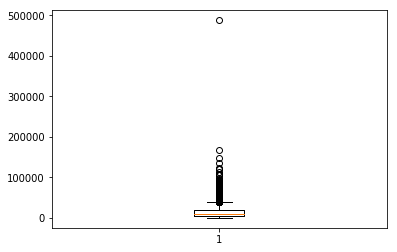

In [8]:
plt.boxplot(turnover_values.turnover)

In [15]:
outlier_index = turnover_values[turnover_values.turnover == turnover_values.turnover.max()].index
turnover_values.drop(index = outlier_index, inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x2645c40de10>],
 'caps': [<matplotlib.lines.Line2D at 0x2645c41a860>,
 'fliers': [<matplotlib.lines.Line2D at 0x2645c421550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2645c4210f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2645c40df60>,
  <matplotlib.lines.Line2D at 0x2645c41a438>]}

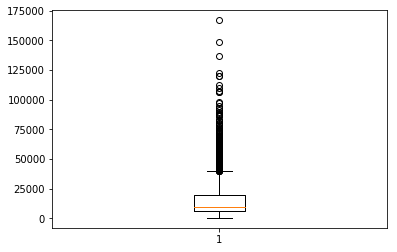

In [16]:
plt.boxplot(turnover_values.turnover)

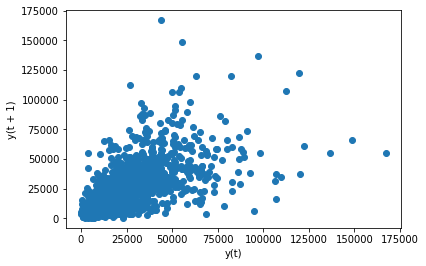

In [17]:
from pandas.plotting import lag_plot
lag_plot(turnover_values.turnover)

In [18]:
values = pd.DataFrame(turnover_values.turnover)
df_consequtive_values = pd.concat([values.shift(1), values], axis=1)
df_consequtive_values.columns = ['t+1', 't']
df_consequtive_values.corr()

,t+1,t
t+1,1.000000,0.741275
t,0.741275,1.000000


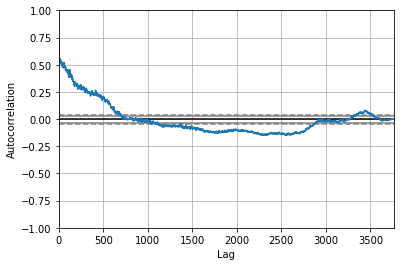

In [19]:
%matplotlib inline
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(turnover_values.turnover)

#### Description of a lag plot
The horizontal axis of an autocorrelation plot
shows the size of the lag between the elements of the time series.
For example, the autocorrelation with lag 2 is the correlation between the time series
elements and the corresponding elements that were observed two time periods earlier

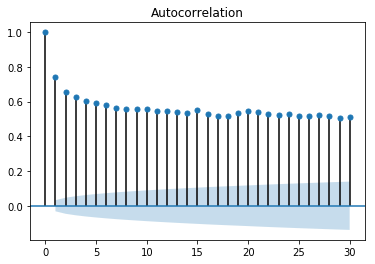

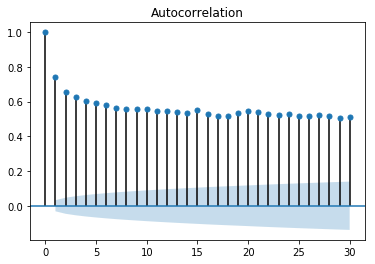

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(turnover_values.turnover, lags=30)

In [28]:
turnover_values.head()

,turnover
Date,
2018-08-17,44002.98
2018-08-16,42757.42
2018-08-14,31355.62
2018-08-13,31750.75
2018-08-10,39190.31


MSE: 256700819.416


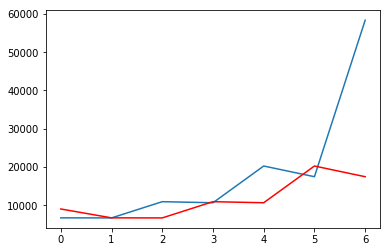

In [89]:
df = pd.concat([turnover_values.shift(1), turnover_values], axis=1)
df.columns = ['t-1', 't']
df['t-1'].iloc[0] = 0
X = df.values
train, test = X[1:len(X)-7], X[len(X) -7:]
train_X, train_Y = train[:,0], train[:,1]
test_X, test_Y = test[:,0], test[:,1]

# persistence model: simple past values will be persisting
def persistence_model(x):
    return x

# walk forwarad validation
prediction = list()
for x in test_X:
    yhat = persistence_model(x)
    prediction.append(yhat)

test_score = mean_squared_error(test_Y, prediction)
print('MSE: %.3f' % test_score)
plt.plot(test_Y)
plt.plot(prediction, color='red')

In [90]:
# removing the outlier and normalizig the values in range
prediction.pop()
prediction_test = np.array(prediction)/1000
test_y = test_Y[:-1]/1000

MSE: 20.586
[  6.69303   6.6757   10.92001  10.64313  20.24622  17.4482 ]


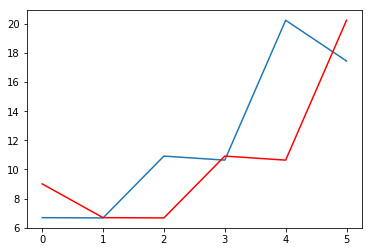

In [91]:
test_score = mean_squared_error(test_y, prediction_test)
print('MSE: %.3f' % test_score)
plt.plot(test_y)
plt.plot(prediction_test, color='red')
print(test_y)